# Katz centrality

In [64]:
#import libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer
import math
import scipy.stats as stats
import pandas as pd
import sklearn
from sklearn import preprocessing

## Algorithm

In [120]:
def katz(G, max_num_of_steps, tolerance, alpha, beta):
    '''Computes the Katz centrality for the nodes of the graph G.'''
    start = timer()
    A = nx.adjacency_matrix(G)
    # first guess for vector r is first column of A
    r = A[:, 0]  
    diff = 1000
    k = 0
    vector = np.ones((A.shape[1], 1))
    while diff > tolerance and k < max_num_of_steps:
        # inner product of matrix A and vector r
        r, q = alpha*A.dot(r) + beta * vector, r
        diff = np.linalg.norm(q-r, ord=1)
        k += 1
    #normalized_r = preprocessing.normalize(r, axis=0, norm ='l1')
    print('process finished after {} iterations'.format(k))
    end = timer()
    # timing of the process
    print('time consumption: {} seconds'.format(end-start))
    return r

### Small example

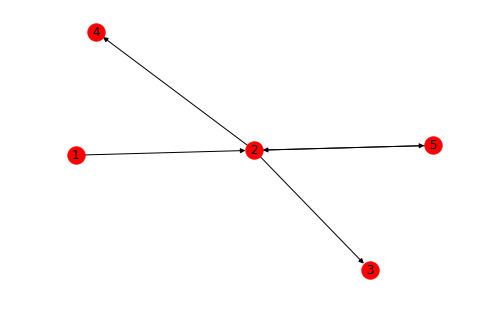

In [121]:
T = nx.DiGraph()   # or DiGraph, etc
T.add_edges_from(((1, 2), (2, 3), (2, 4), (2, 5), (5, 2)))
nx.draw(T, with_labels=True)
plt.show()

In [122]:
test = katz(T, 100, 0.1, 0.2, 1)
test

process finished after 4 iterations
time consumption: 0.0010353779998695245 seconds


matrix([[1.328],
        [1.664],
        [1.   ],
        [1.   ],
        [1.328]])

In [123]:
def rank(array):
    '''Returns vector with ranked values of array,
    where 0 is the minimum value of array'''
    temp = array.argsort(axis=0)
    ranks = temp.argsort(axis=0)
    return ranks

In [124]:
rank(test)

matrix([[2],
        [4],
        [0],
        [1],
        [3]], dtype=int64)

### Katz centrality on networks

In [125]:
#citation:@misc{snapnets,
#  author       = {Jure Leskovec and Andrej Krevl},
#  title        = {{SNAP Datasets}: {Stanford} Large Network Dataset Collection},
#  howpublished = {\url{http://snap.stanford.edu/data}},
#  month        = jun,
#  year         = 2014
#}
G_fb = nx.read_edgelist('facebook_combined.txt')

In [126]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


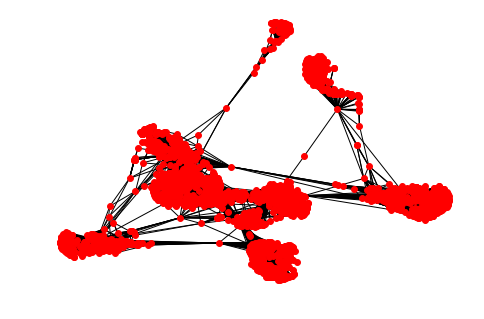

In [10]:
spring_pos = nx.spring_layout(G_fb)
nx.draw(G_fb, pos = spring_pos, node_size = 35)
plt.show()

Vemo, da je maksimalna lastna vrednost matrike sosednosti omejena z maksimalnim številom stopenj vseh vozlišč. V informacijah o grafu vidimo, da je povprečna stopnja vozlišča enaka 43.6910. Poskusimo z alfo manjšo od 1/43.6910 oziroma 0.0229.

In [127]:
r1 = katz(G_fb, 10000000, 0.01, 0.01, 1)
rank(r1)

process finished after 1454 iterations
time consumption: 1.5228195489999052 seconds


c:\users\tina\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]


matrix([[3238],
        [1977],
        [1787],
        ...,
        [ 217],
        [ 232],
        [ 695]], dtype=int64)

In [129]:
r2 = katz(G_fb, 10000000, 0.01, 0.0061, 1)
rank(r2)

process finished after 1057 iterations
time consumption: 1.1888756090002062 seconds


matrix([[3404],
        [1125],
        [ 577],
        ...,
        [  17],
        [  91],
        [ 361]], dtype=int64)

Pri alpha = 0.0061 konvergira pri alpha = 0.0062 pa že divergira.

In [130]:
r3 = katz(G_fb, 10000000, 0.01, 0.003, 1)
rank(r3)

process finished after 16 iterations
time consumption: 0.19349783000052412 seconds


matrix([[3977],
        [1403],
        [ 807],
        ...,
        [  43],
        [ 175],
        [ 598]], dtype=int64)

In [131]:
r4 = katz(G_fb, 10000000, 0.01, 0.001, 1)
rank(r4)

process finished after 7 iterations
time consumption: 0.22587556300004508 seconds


matrix([[4034],
        [1488],
        [ 877],
        ...,
        [  68],
        [ 258],
        [ 750]], dtype=int64)

In [132]:
r5 = katz(G_fb, 10000000, 0.01, 0.0001, 1)
rank(r5)

process finished after 4 iterations
time consumption: 0.21555023200016876 seconds


matrix([[4034],
        [1496],
        [ 883],
        ...,
        [  79],
        [ 275],
        [ 769]], dtype=int64)

In [133]:
r6 = katz(G_fb, 10000000, 0.01, 0.000000001, 1)
rank(r6)

process finished after 2 iterations
time consumption: 0.17569843900037085 seconds


matrix([[4034],
        [1549],
        [ 953],
        ...,
        [  76],
        [ 340],
        [ 836]], dtype=int64)

In [134]:
r7 = katz(G_fb, 10000000, 0.01, 0.000000000000000001, 1)
rank(r7)

process finished after 2 iterations
time consumption: 0.22473266499946476 seconds


matrix([[4035],
        [3011],
        [3025],
        ...,
        [1281],
        [ 672],
        [1913]], dtype=int64)

In [139]:
#graph of time of katz algorithm depending on alpha

def katz2(G, max_num_of_steps, tolerance, alpha, beta):
    '''Computes the Katz centrality for the nodes of the graph G.'''
    start = timer()
    A = nx.adjacency_matrix(G)
    # first guess for vector r is first column of A
    r = A[:, 0]  
    diff = 1000
    k = 0
    vector = np.ones((A.shape[1], 1))
    while diff > tolerance and k < max_num_of_steps:
        # inner product of matrix A and vector r
        r, q = alpha*A.dot(r) + beta * vector, r
        diff = np.linalg.norm(q-r, ord=1)
        k += 1
    #normalized_r = preprocessing.normalize(r, axis=0, norm ='l1')
    print('process finished after {} iterations'.format(k))
    end = timer()
    # timing of the process
    print('time consumption: {} seconds'.format(end-start))
    return (end-start, k)

timings = {}
for alpha in range (0,232):
    timings[alpha/10000] = katz2(G_fb, 100000, 0.0000001, alpha/10000, 1)

process finished after 2 iterations
time consumption: 0.3646411760000774 seconds
process finished after 7 iterations
time consumption: 0.2140096809998795 seconds
process finished after 8 iterations
time consumption: 0.17435244799889915 seconds
process finished after 9 iterations
time consumption: 0.20356374600123672 seconds
process finished after 9 iterations
time consumption: 0.20056740899963188 seconds
process finished after 10 iterations
time consumption: 0.20888057999945886 seconds
process finished after 11 iterations
time consumption: 0.17477911499918264 seconds
process finished after 11 iterations
time consumption: 0.20987954900010664 seconds
process finished after 12 iterations
time consumption: 0.20880833199953486 seconds
process finished after 13 iterations
time consumption: 0.18299784999908297 seconds
process finished after 13 iterations
time consumption: 0.2516359820001526 seconds
process finished after 14 iterations
time consumption: 0.22662080699956277 seconds
process fini

c:\users\tina\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


process finished after 30867 iterations
time consumption: 28.286446852000154 seconds
process finished after 18238 iterations
time consumption: 16.57308314399961 seconds
process finished after 13004 iterations
time consumption: 11.86333244799971 seconds
process finished after 10140 iterations
time consumption: 9.305741850999766 seconds
process finished after 8333 iterations
time consumption: 7.555500499000118 seconds
process finished after 7089 iterations
time consumption: 6.506096495999373 seconds
process finished after 6180 iterations
time consumption: 5.739362491000065 seconds
process finished after 5487 iterations
time consumption: 5.106515880999723 seconds
process finished after 4941 iterations
time consumption: 4.6069576230001985 seconds
process finished after 4499 iterations
time consumption: 4.16713836999952 seconds
process finished after 4135 iterations
time consumption: 3.878632710000602 seconds
process finished after 3829 iterations
time consumption: 3.60849305299962 seconds


c:\users\tina\appdata\local\programs\python\python37\lib\site-packages\numpy\linalg\linalg.py:2414: RuntimeWarning: overflow encountered in reduce
  ret = add.reduce(abs(x), axis=row_axis).max(axis=col_axis)


process finished after 997 iterations
time consumption: 1.1146219760012173 seconds
process finished after 986 iterations
time consumption: 1.1505376280001656 seconds
process finished after 976 iterations
time consumption: 1.1285534919989004 seconds
process finished after 965 iterations
time consumption: 1.0398705669995252 seconds
process finished after 955 iterations
time consumption: 1.0652663279997796 seconds
process finished after 945 iterations
time consumption: 1.0463530540000647 seconds
process finished after 936 iterations
time consumption: 1.0112520500006212 seconds
process finished after 927 iterations
time consumption: 1.0195464469998115 seconds
process finished after 917 iterations
time consumption: 1.110558973001389 seconds
process finished after 909 iterations
time consumption: 1.0690778819989646 seconds
process finished after 900 iterations
time consumption: 1.0299349249999068 seconds
process finished after 892 iterations
time consumption: 0.9945028279998951 seconds
proce

process finished after 549 iterations
time consumption: 0.669878422999318 seconds
process finished after 547 iterations
time consumption: 0.6955034470011014 seconds
process finished after 545 iterations
time consumption: 0.7894008070015843 seconds
process finished after 543 iterations
time consumption: 0.661471954001172 seconds
process finished after 541 iterations
time consumption: 0.7158855920006317 seconds
process finished after 540 iterations
time consumption: 0.7996675409995078 seconds
process finished after 538 iterations
time consumption: 0.6666647700003523 seconds
process finished after 536 iterations
time consumption: 0.849732025000776 seconds


In [142]:
iterations= [i[1] for i in timings.values()]
iterations

[2,
 7,
 8,
 9,
 9,
 10,
 11,
 11,
 12,
 13,
 13,
 14,
 15,
 15,
 16,
 17,
 18,
 18,
 19,
 20,
 21,
 22,
 23,
 23,
 24,
 25,
 27,
 28,
 29,
 30,
 32,
 33,
 35,
 36,
 38,
 40,
 42,
 44,
 46,
 49,
 52,
 55,
 58,
 62,
 66,
 70,
 76,
 81,
 88,
 96,
 105,
 116,
 129,
 145,
 166,
 193,
 229,
 281,
 362,
 505,
 830,
 2261,
 100000,
 30867,
 18238,
 13004,
 10140,
 8333,
 7089,
 6180,
 5487,
 4941,
 4499,
 4135,
 3829,
 3569,
 3345,
 3149,
 2978,
 2826,
 2690,
 2569,
 2459,
 2359,
 2268,
 2185,
 2109,
 2039,
 1974,
 1913,
 1857,
 1805,
 1756,
 1710,
 1667,
 1626,
 1588,
 1552,
 1518,
 1485,
 1454,
 1425,
 1398,
 1371,
 1346,
 1322,
 1299,
 1277,
 1256,
 1236,
 1216,
 1198,
 1180,
 1163,
 1146,
 1130,
 1115,
 1100,
 1085,
 1072,
 1058,
 1045,
 1033,
 1021,
 1009,
 997,
 986,
 976,
 965,
 955,
 945,
 936,
 927,
 917,
 909,
 900,
 892,
 884,
 876,
 868,
 860,
 853,
 846,
 839,
 832,
 825,
 819,
 812,
 806,
 800,
 794,
 788,
 782,
 777,
 771,
 766,
 761,
 756,
 751,
 746,
 741,
 736,
 731,
 727,
 

In [156]:
max(iterations)

100000

In [157]:
timings

{0.0: (0.3646411760000774, 2),
 0.0001: (0.2140096809998795, 7),
 0.0002: (0.17435244799889915, 8),
 0.0003: (0.20356374600123672, 9),
 0.0004: (0.20056740899963188, 9),
 0.0005: (0.20888057999945886, 10),
 0.0006: (0.17477911499918264, 11),
 0.0007: (0.20987954900010664, 11),
 0.0008: (0.20880833199953486, 12),
 0.0009: (0.18299784999908297, 13),
 0.001: (0.2516359820001526, 13),
 0.0011: (0.22662080699956277, 14),
 0.0012: (0.17790743399928033, 15),
 0.0013: (0.21072207299948786, 15),
 0.0014: (0.20685078499991505, 16),
 0.0015: (0.2138680279986147, 17),
 0.0016: (0.17736016199887672, 18),
 0.0017: (0.20840499000041746, 18),
 0.0018: (0.20895795000069484, 19),
 0.0019: (0.20983005600101023, 20),
 0.002: (0.17990366500089294, 21),
 0.0021: (0.2684938610000245, 22),
 0.0022: (0.21689508500094234, 23),
 0.0023: (0.18260588599878247, 23),
 0.0024: (0.2262413579992426, 24),
 0.0025: (0.25130090699894936, 25),
 0.0026: (0.22012637300031201, 27),
 0.0027: (0.22191837200080045, 28),
 0.0028:

Pri alpha = 0.0062 ponori.

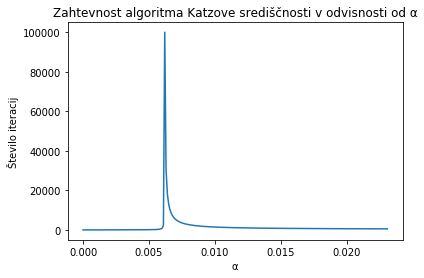

In [148]:
plt.plot(timings.keys(), iterations)
plt.xlabel('α')
plt.ylabel('Število iteracij')
plt.title('Zahtevnost algoritma Katzove središčnosti v odvisnosti od α')
plt.savefig('Katz_alpha.png')
plt.show()

In [152]:
r7 = katz(G_fb, 10000000, 0.01, 1000000000000000000, 1)
rank(r7)

process finished after 17 iterations
time consumption: 0.216724988000351 seconds


c:\users\tina\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]


matrix([[   0],
        [2683],
        [2684],
        ...,
        [1352],
        [2018],
        [4038]], dtype=int64)